In [37]:
#import modules
%matplotlib inline
import xarray as xr

In [38]:
#get the url of the data (it's a very large file and takes time to download)
datapath = "https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/temperature/A5B7/0.25/woa18_A5B7_t00_04.nc"

In [39]:
import xarray

In [40]:
#read the data using xarray
data = xarray.open_dataset(datapath, decode_times=False)

In [41]:
#slice the data, we only need sea surface temp where depth=0
surface_temp = data.t_an.sel(depth = 0)

In [42]:
#import certopy and matplot modules for the actual plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
GeoAxes._pcolormesh_patched = Axes.pcolormesh

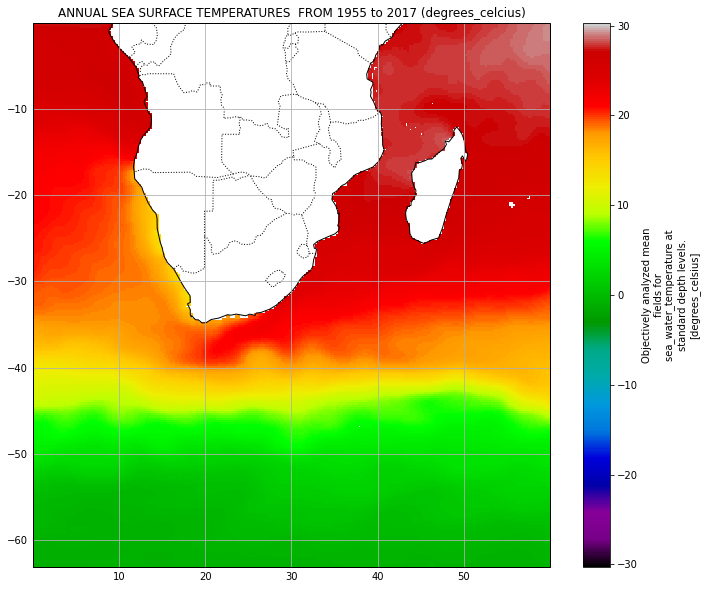

In [54]:
fig = plt.figure(figsize=(12, 10))#specify the size of the map
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))#use matplotlib with cartopy and PlateCarree projectiob
surface_temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='nipy_spectral')#plot

#customising the plot
ax.coastlines()#add the coast
ax.set_extent([0,60,0,-60])#instead of using set_global function, I specified with the coordinateds we discussed 
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
plt.title('ANNUAL SEA SURFACE TEMPERATURES  FROM 1955 to 2017 (degrees_celcius)')#add title

ax.add_feature(cfeature.BORDERS, linestyle=':')#show borders